In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
# !pip install altair_data_server
# from altair_data_server  import data_server
# alt.data_transformers.enable('data_server')
# alt.data_transformers.enable('json')
# alt.data_transformers.disable_max_rows()


In [3]:
# Takes 2-3 mins to download ~300Mb
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535


In [5]:
df = pd.read_csv(
    "accidents.csv",
    parse_dates=True,
    low_memory=False)

In [6]:
# each row in the dataframe represents a single collision
df.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN       NaN        NaN   
1  03/26/2022      11:45       NaN      NaN       NaN        NaN   
2  11/01/2023       1:29  BROOKLYN    11230  40.62179 -73.970024   
3  06/29/2022       6:55       NaN      NaN       NaN        NaN   
4  09/21/2022      13:21       NaN      NaN       NaN        NaN   

                 LOCATION           ON STREET NAME CROSS STREET NAME  \
0                     NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                     NaN  QUEENSBORO BRIDGE UPPER               NaN   
2  (40.62179, -73.970024)            OCEAN PARKWAY          AVENUE K   
3                     NaN       THROGS NECK BRIDGE               NaN   
4                     NaN          BROOKLYN BRIDGE               NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0             NaN  ...                    Unspecified   
1             NaN  ...                            NaN   
2             NaN  ...                    Unspecified   
3             NaN  ...                    Unspecified   
4             NaN  ...                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                    Unspecified                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN       4455765   
1                            NaN       4513547   
2                            NaN       4675373   
3                            NaN       4541903   
4                            NaN       4566131   

                   VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
0                                Sedan                Sedan   
1                                Sedan                  NaN   
2                                Moped                Sedan   
3                                Sedan        Pick-up Truck   
4  Station Wagon/Sport Utility Vehicle                  NaN   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                Sedan                 NaN                 NaN  
3                  NaN                 NaN                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [ ]:
number_of_collisions = pd.DataFrame(df['COLLISION_ID'].value_counts())

count
COLLISION_ID       
4455765           1
4513547           1
4675373           1
4541903           1
4566131           1
...             ...
4875660           1
4876139           1
4876157           1
4876188           1
4875724           1

[2239361 rows x 1 columns]

#**Task 1**

Find the distribution of injured people using the "NUMBER OF PERSONS INJURED" field. Sort the results based on the index value instead of the frequency. Use the `value_counts()` approach and save to a variable called "injured_person_distr".

What do the frequencies of these values represent?

In [7]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='str')

In [8]:
df['NUMBER OF PERSONS INJURED'].unique()

array([ 2.,  1.,  0.,  4.,  3.,  5.,  7.,  6.,  9., 18.,  8., 11., 17.,
       10., 14., 15., 12., 13., 23., 40., 21., 34., 25., 16., nan, 20.,
       22., 31., 19., 27., 32., 24., 43.])

In [ ]:
#TODO
injured_person_distr= pd.DataFrame(df['NUMBER OF PERSONS INJURED'].value_counts())
injured_person_distr

count
NUMBER OF PERSONS INJURED         
0.0                        1693399
1.0                         424079
2.0                          79628
3.0                          26121
4.0                           9568
5.0                           3689
6.0                           1510
7.0                            631
8.0                            283
9.0                            145
10.0                            96
11.0                            58
12.0                            34
13.0                            29
15.0                            17
14.0                            11
17.0                             8
16.0                             8
18.0                             6
20.0                             4
19.0                             4
22.0                             3
24.0                             3
23.0                             1
40.0                             1
21.0                             1
34.0                             1
25.0                             1
31.0                             1
27.0                             1
32.0                             1
43.0                             1

In [15]:
injured_person_distr = injured_person_distr.reset_index()

In [16]:
injured_person_distr

NUMBER OF PERSONS INJURED    count
0                         0.0  1693399
1                         1.0   424079
2                         2.0    79628
3                         3.0    26121
4                         4.0     9568
5                         5.0     3689
6                         6.0     1510
7                         7.0      631
8                         8.0      283
9                         9.0      145
10                       10.0       96
11                       11.0       58
12                       12.0       34
13                       13.0       29
14                       15.0       17
15                       14.0       11
16                       17.0        8
17                       16.0        8
18                       18.0        6
19                       20.0        4
20                       19.0        4
21                       22.0        3
22                       24.0        3
23                       23.0        1
24                       40.0        1
25                       21.0        1
26                       34.0        1
27                       25.0        1
28                       31.0        1
29                       27.0        1
30                       32.0        1
31                       43.0        1

**Write answer here.**

The frequences represent the amount of injuris, like in 424019 collision only 1 person was injured

#**Task 2**

Use a line plot to visualize the number of collisions (y) versus the number of people injured (x). Feel free to use any plotting library of your choosing.

Hint: You may want to adjust the y-scale to improve visibility.

In [20]:
line_chart = alt.Chart(injured_person_distr).mark_line().encode(
    alt.X('NUMBER OF PERSONS INJURED:Q'),
    alt.Y('count:Q',
        scale=alt.Scale(type='log'))
)
line_chart

alt.Chart(...)

In [ ]:
#TODO

alt.Chart(...)

#**Task 3**

In this section, we will address several techniques for counteracting overplotting.

Throughout this task, we will be using the pandas dataframe "plot" method.

Documentation for reference:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html


In [ ]:
df.shape

(2204082, 29)

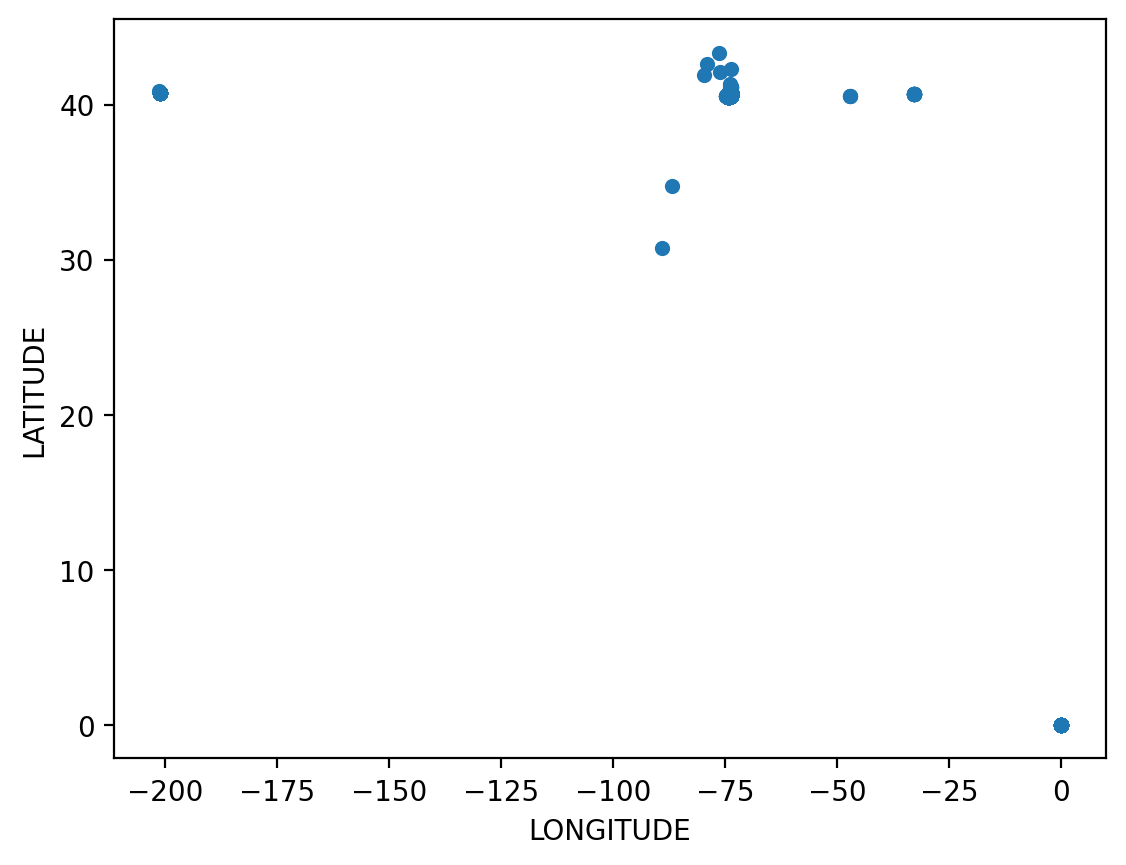

In [ ]:
# Create a scatterplot of collision locations. A location is defined by the ordered pair: (longitude, latitude)
df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE');

Unfortunately, there were cases in the dataset where longitude and latitude were incorrect. Therefore, we create a selection condition to keep only the entries that are valid. We often call such conditions as **masks**.

In [ ]:
clean_mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)
cleandf = df[clean_mask]

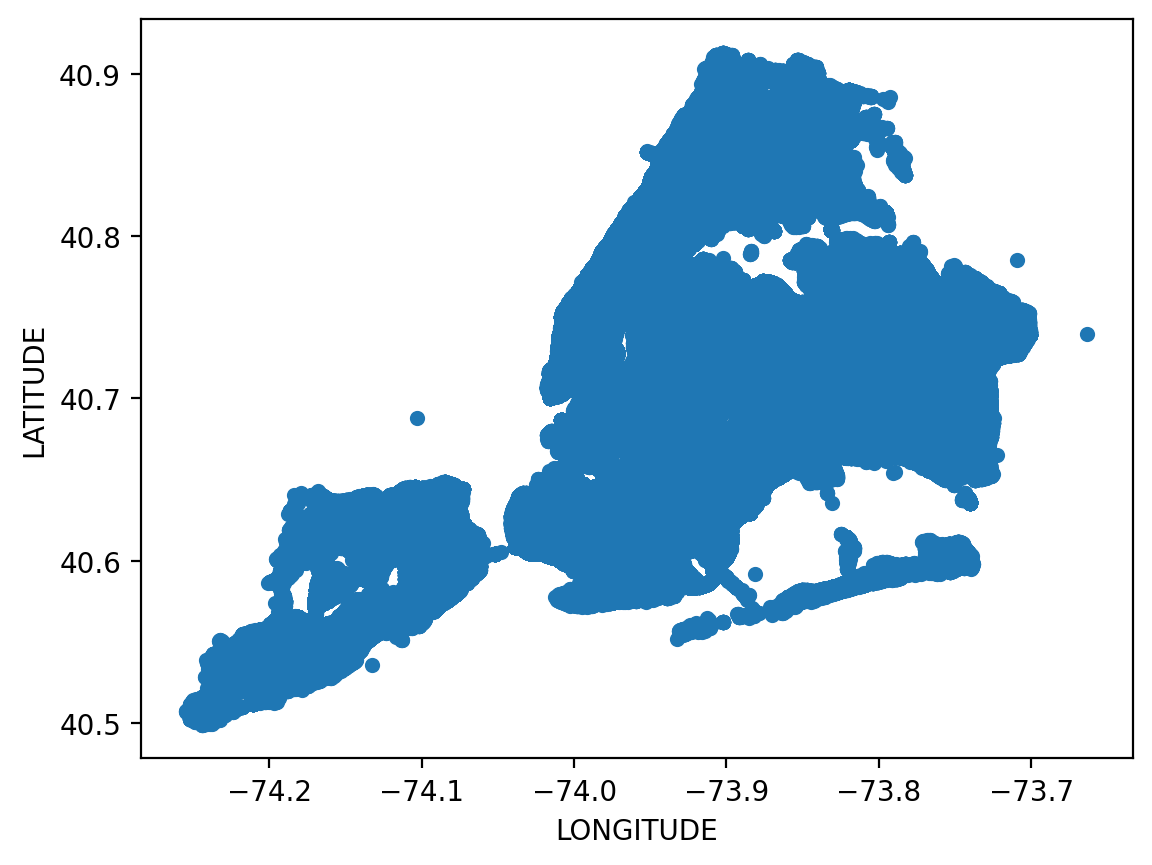

In [ ]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE');

We start seeing the shape of NYC now, but let's make the plot a bit bigger. Adjust the size of the figure to have length 20 on the x axis and 15 on the y axis.

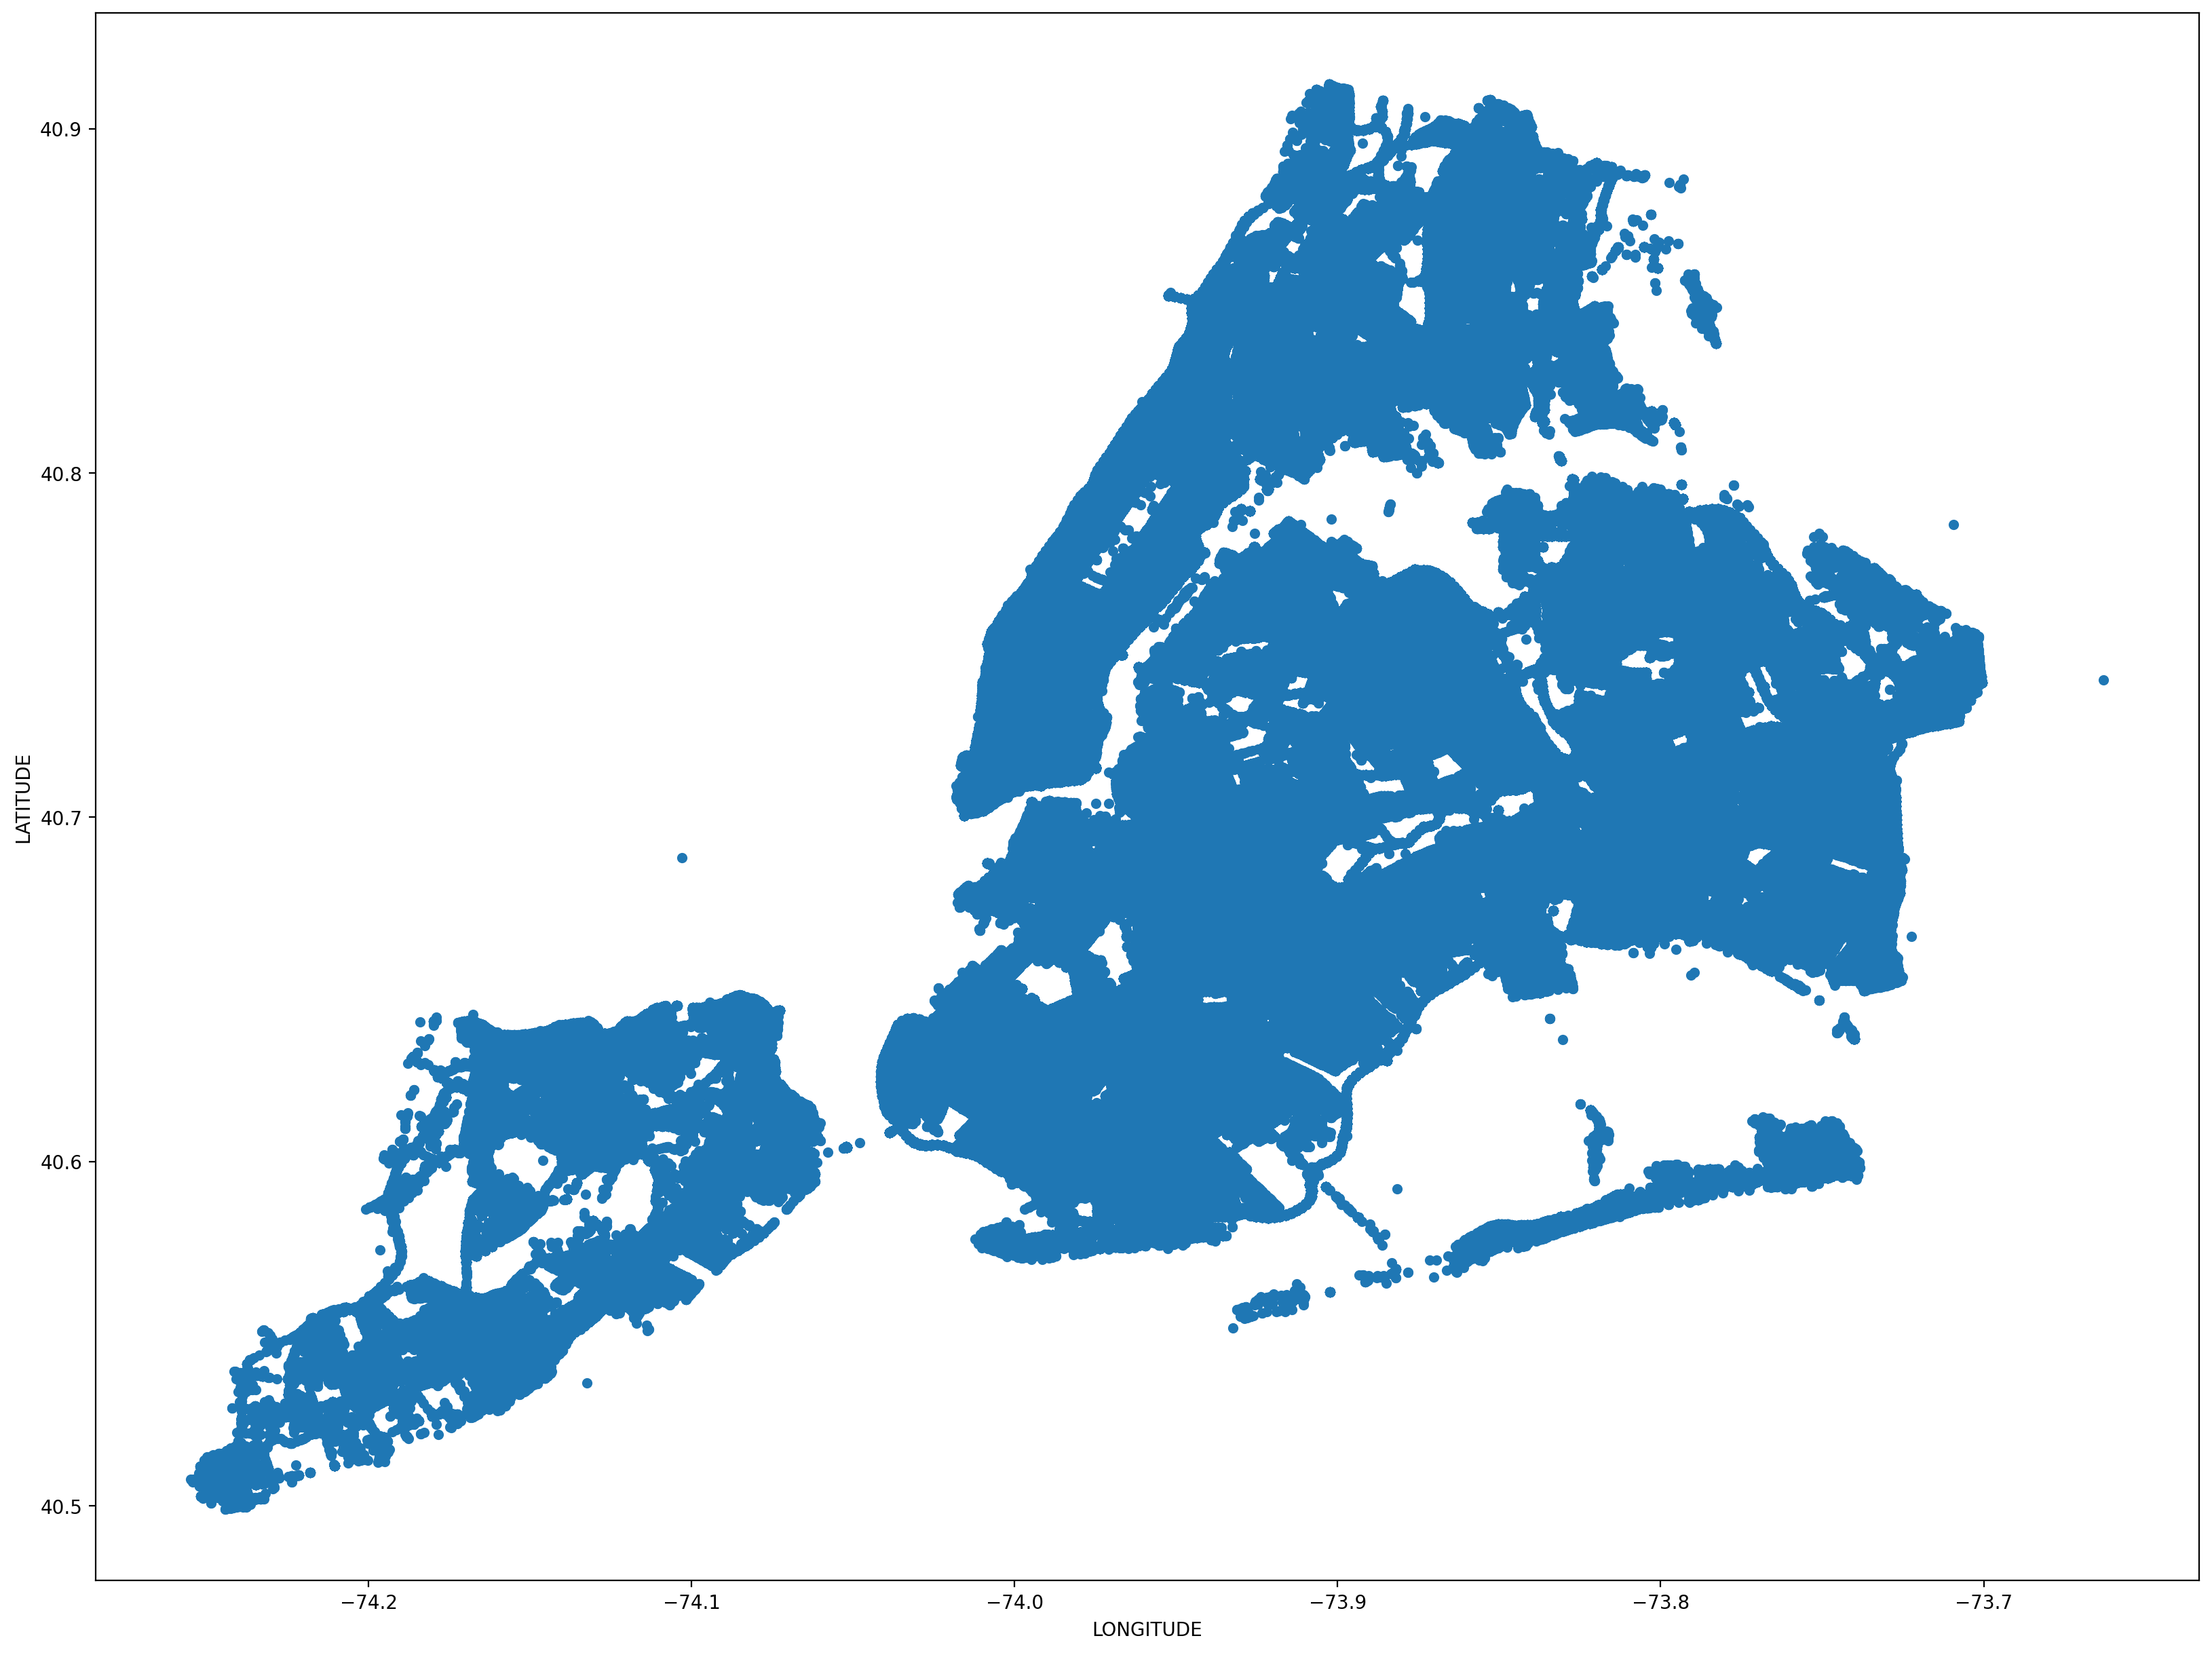

In [ ]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15));

##Addressing Overplotting

The picture above is showing us that accidents happen in all places in NYC, except maybe some areas of Staten Island. But we have so many data points (~1 million), that we cannot tell anything more beyond that. This is called **overplotting**.

Below, we examine a set of techniques for addressing the issue.

###Sampling

One solution that is commonly used when we have too many data points is to simply take a subset of the data. Below, by keeping just 1% of the dataset, we can get a feeling of the density of the accidents in Manhattan, especially around Midtown.

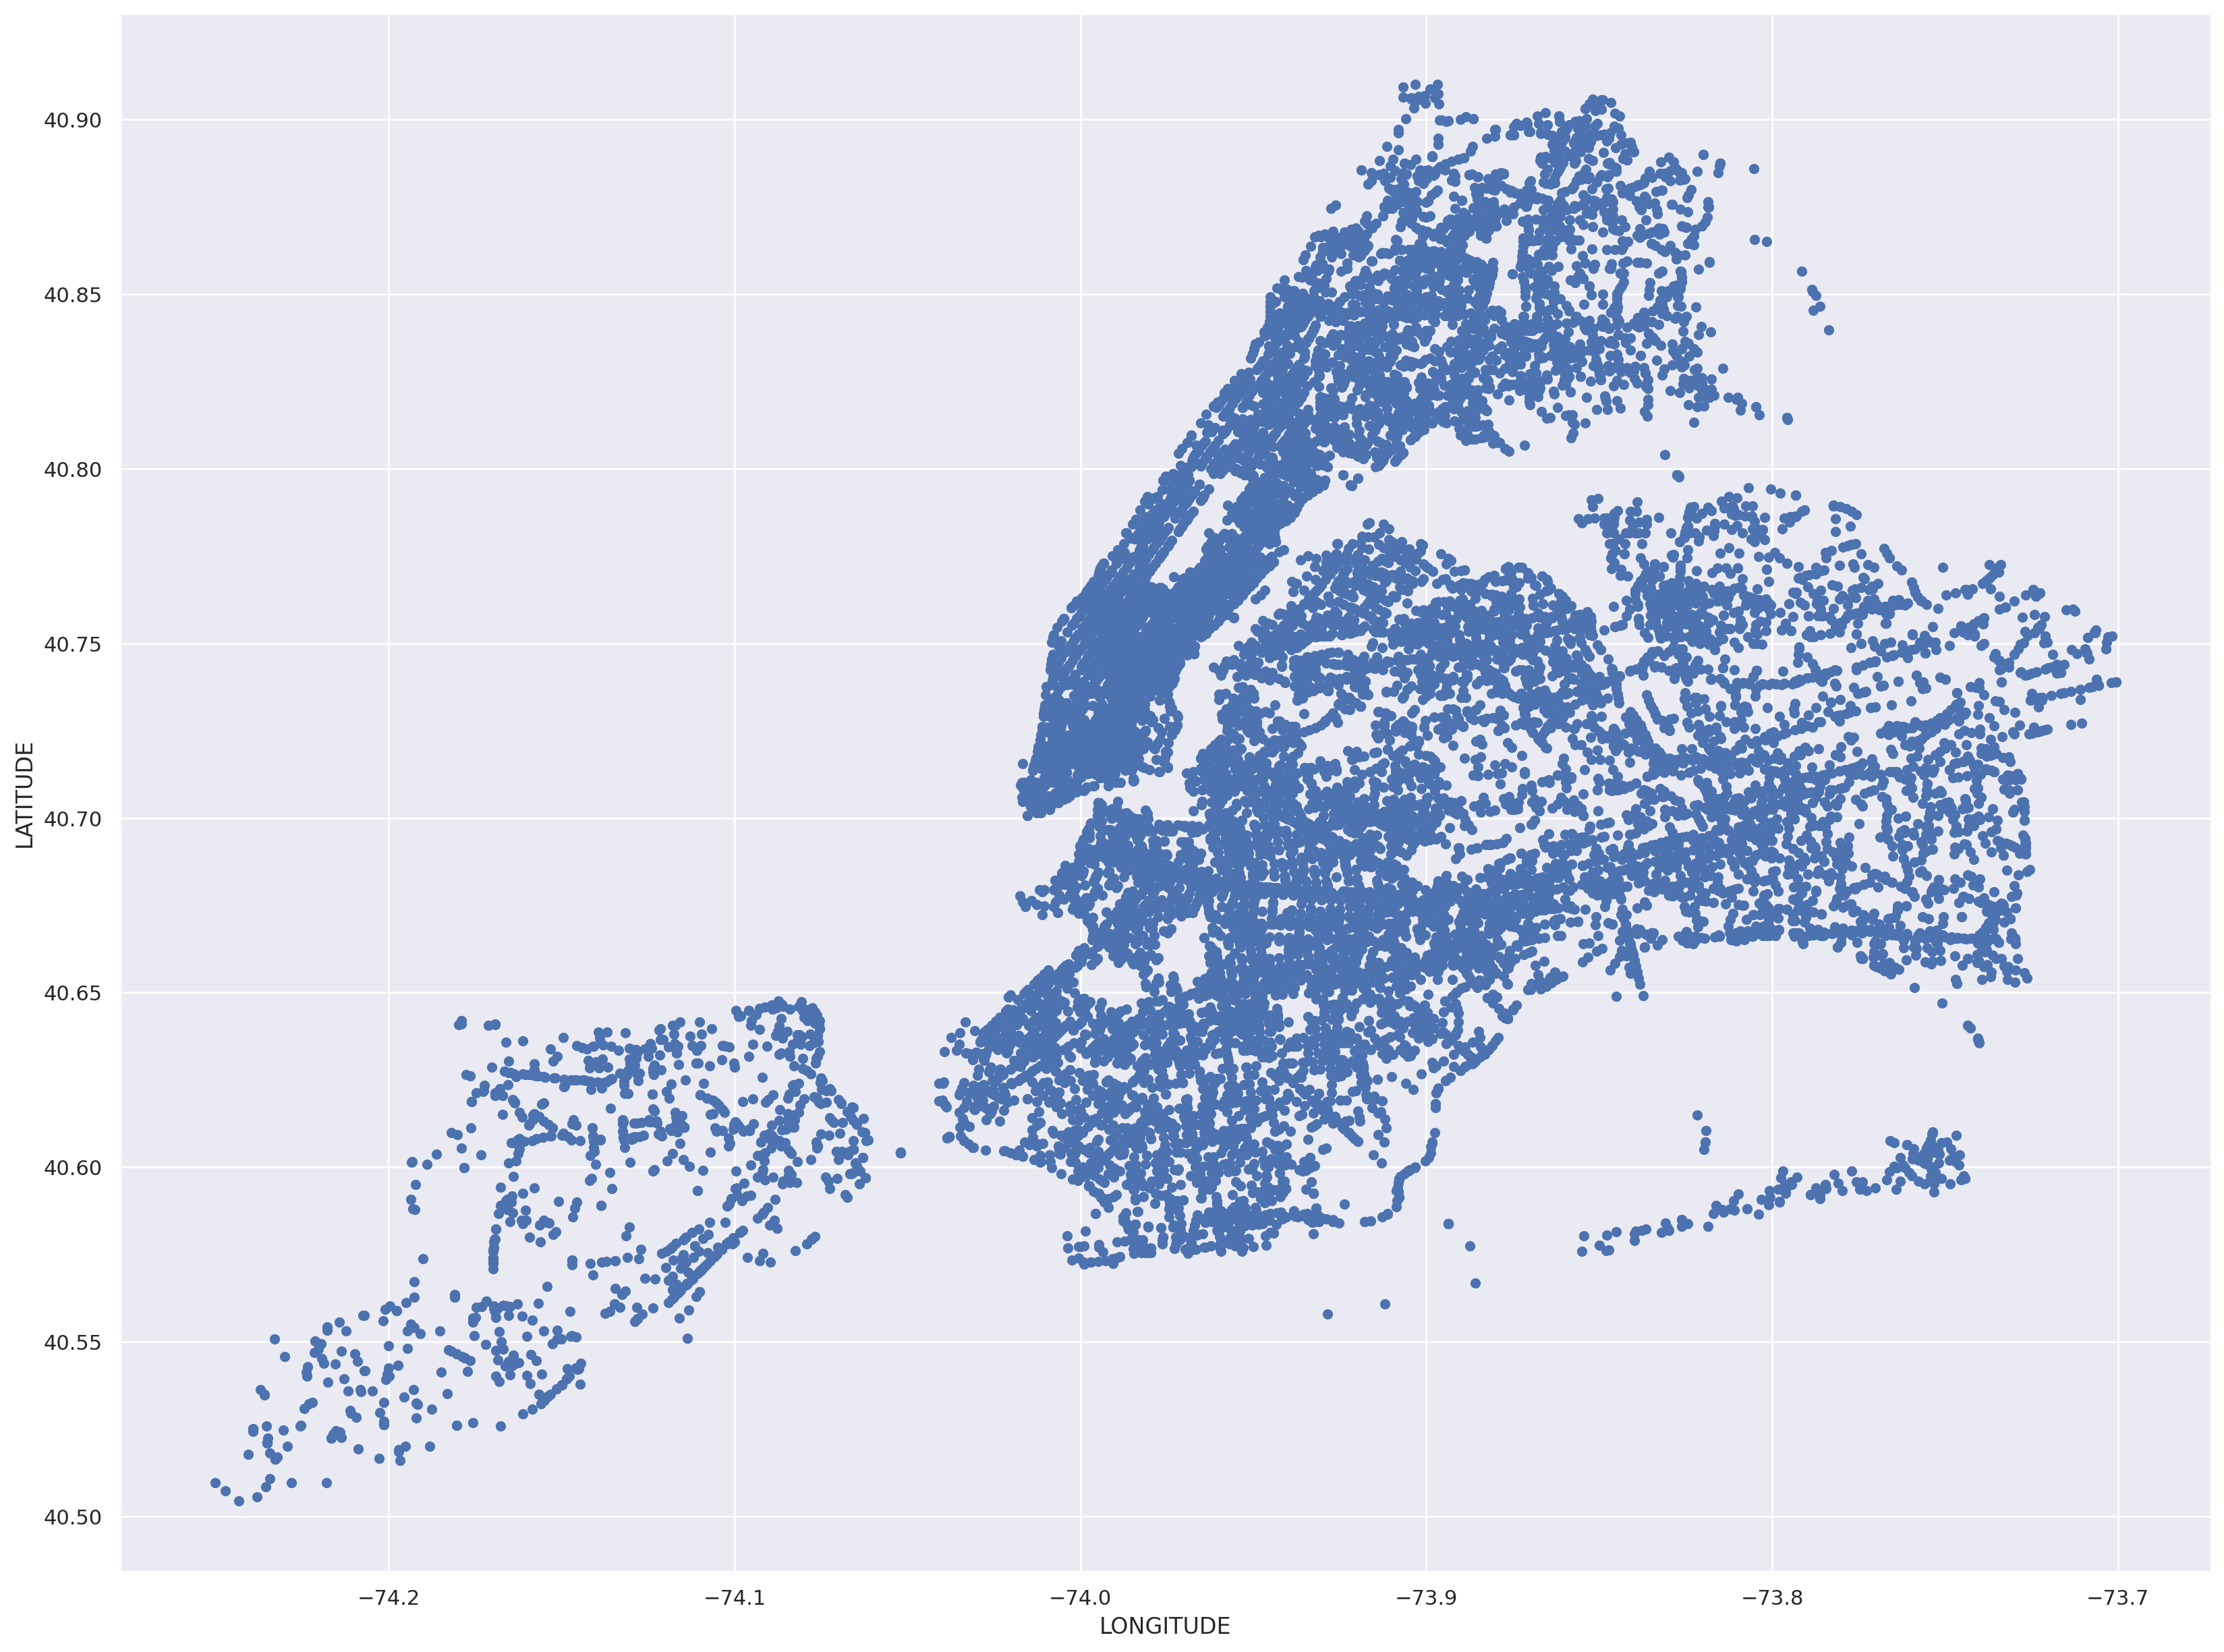

In [ ]:
# We can either specify the number of data points,
# or the percentage of the dataset that we want to keep.

# Keep 10,000 data points
# sample = cleandf.sample(n=10000)

# Keep 1% of the dataset
sample = cleandf.sample(frac=0.01)

sample.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15));

In [ ]:
sample.to_csv('nyc_sample.csv')

###Changing Marker Size

Another technique that we can use is to reduce the marker size. By default, in Pandas, the marker size for scatterplots is 5 pixels. Set the pixel size to 0.5. With this setting, we start seeting that there is a higher density of accidents among major highways.

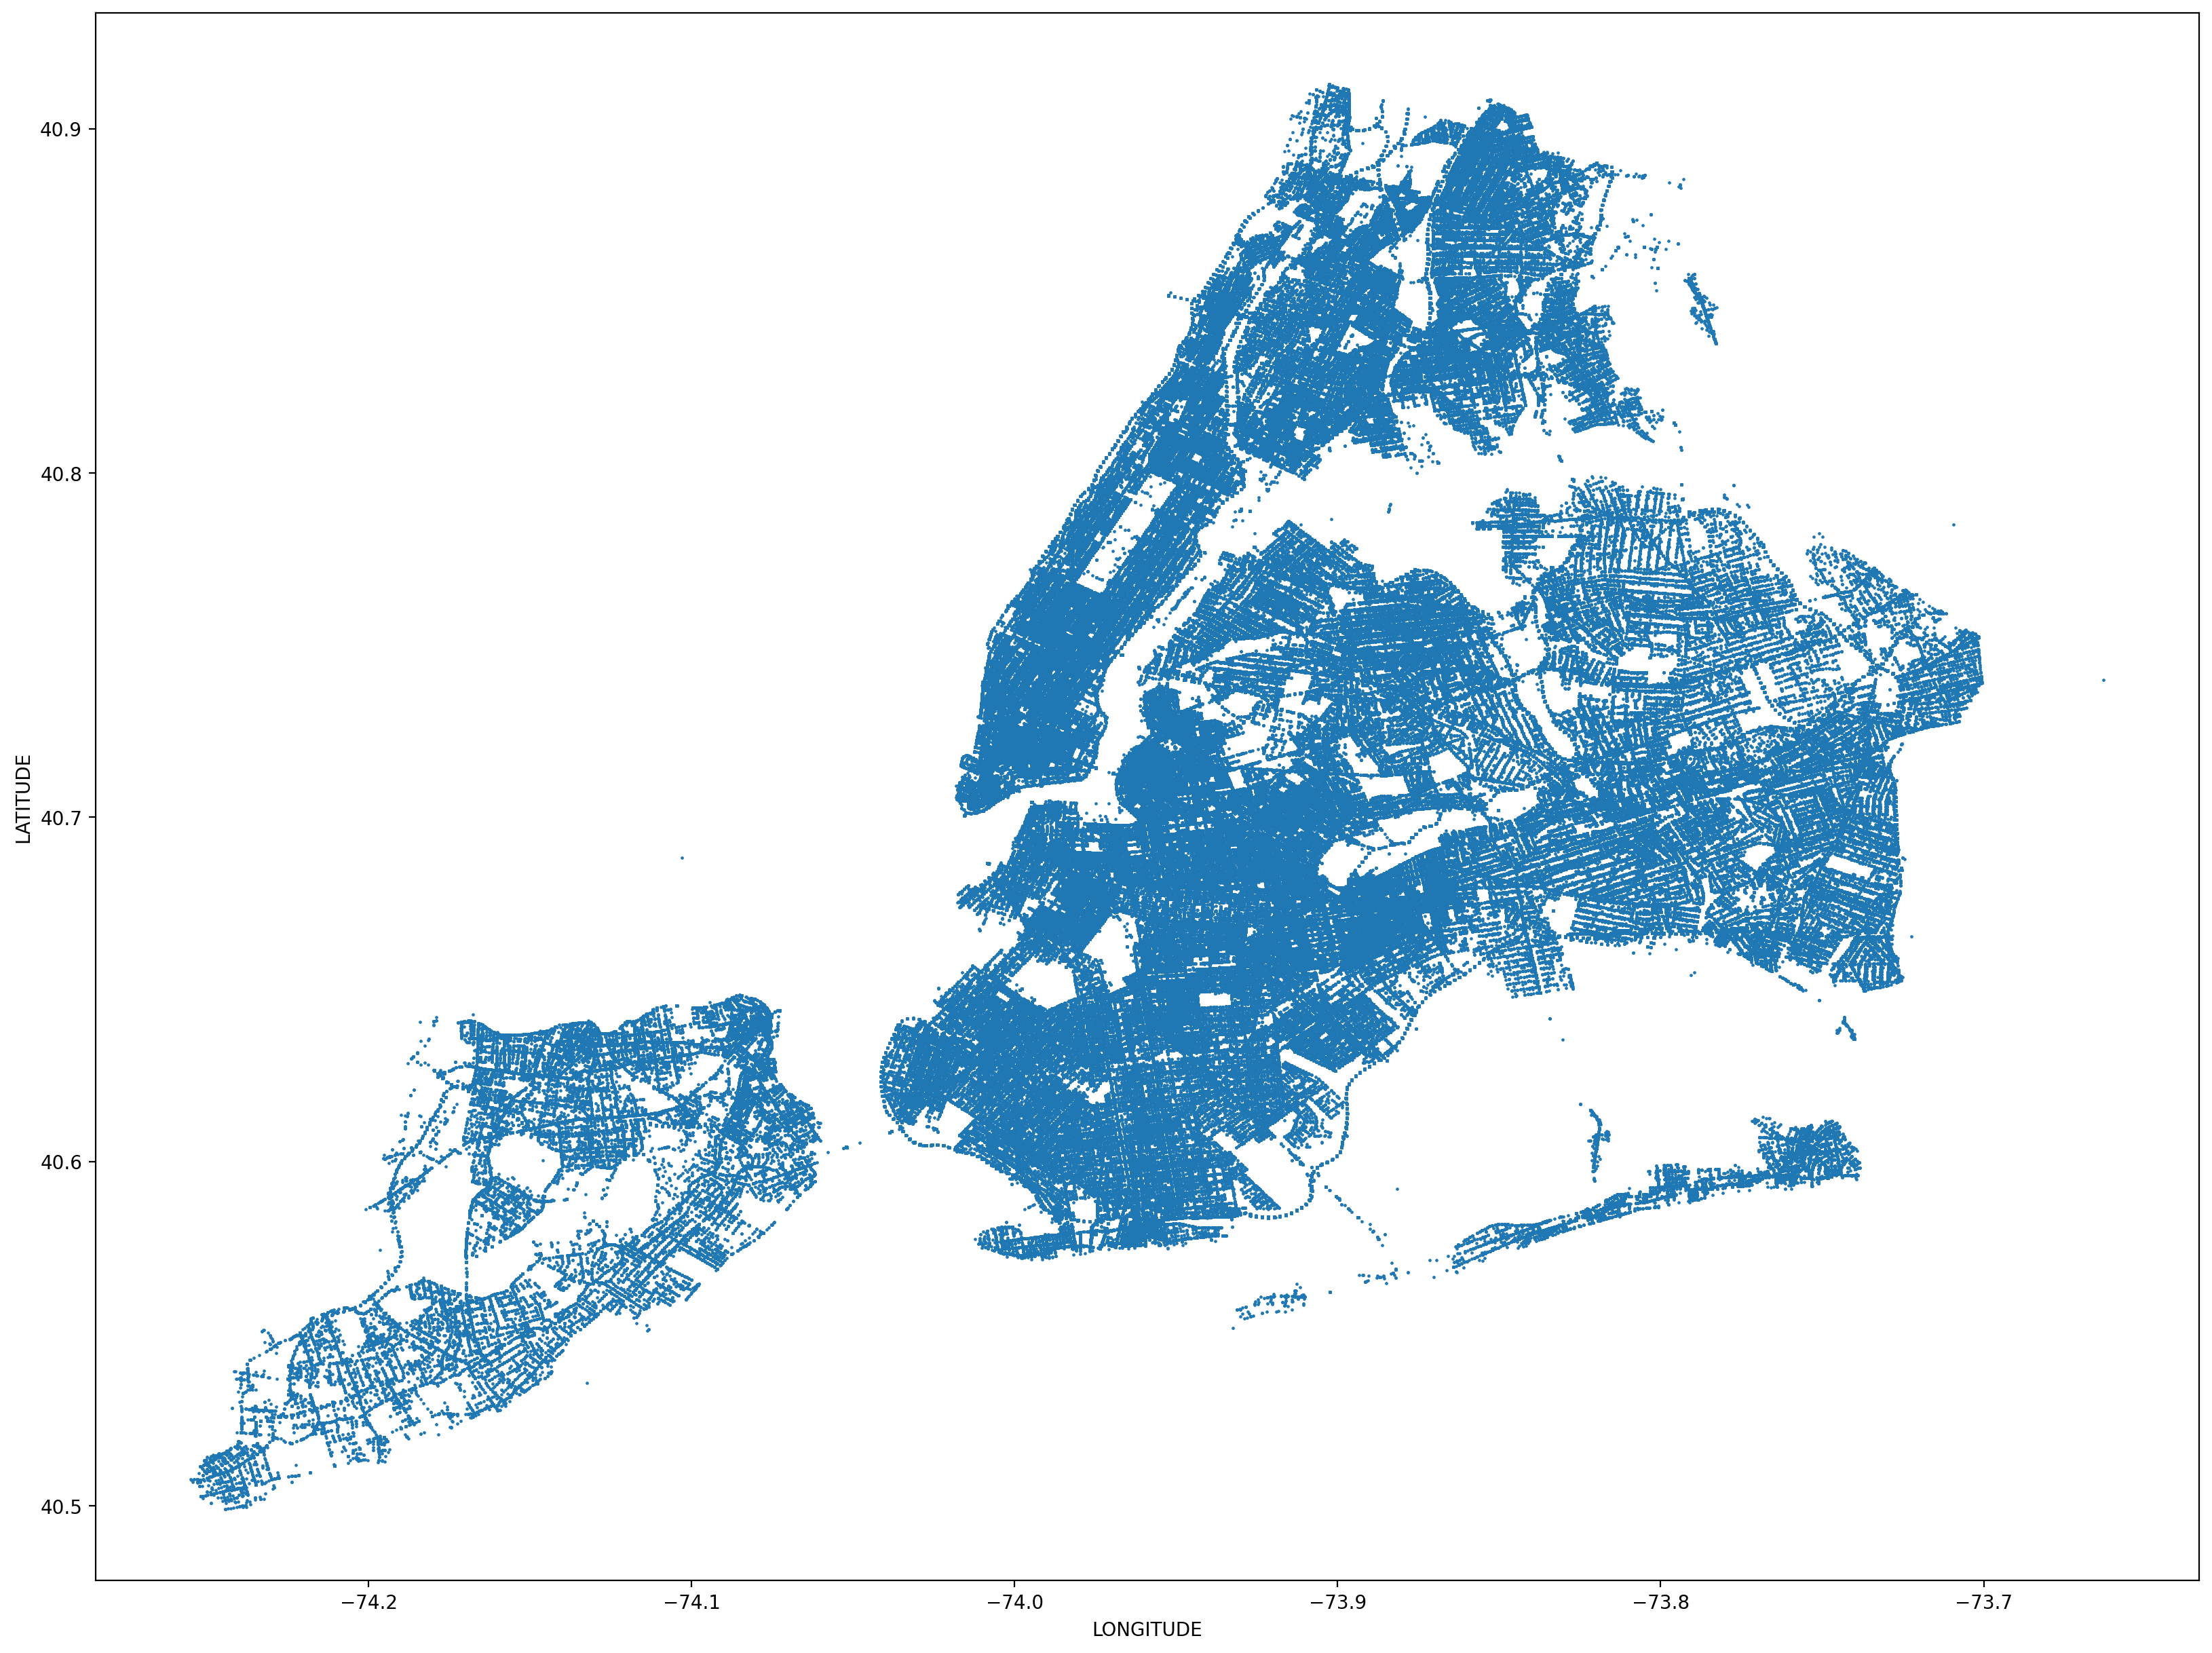

In [ ]:
cleandf.plot(
    kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15), s=0.5 );

###Changing Marker Transparency

Another common technique is to change the  transparency of the  markers. Using semi-transparent markers, we can then optically separate areas where there are many points (the area will still look densely plotted), from areas where there are only a few markers. Adjust the transparency parameter. A value of 1 corresponds to no transparency. A value of 0 to full transparency.

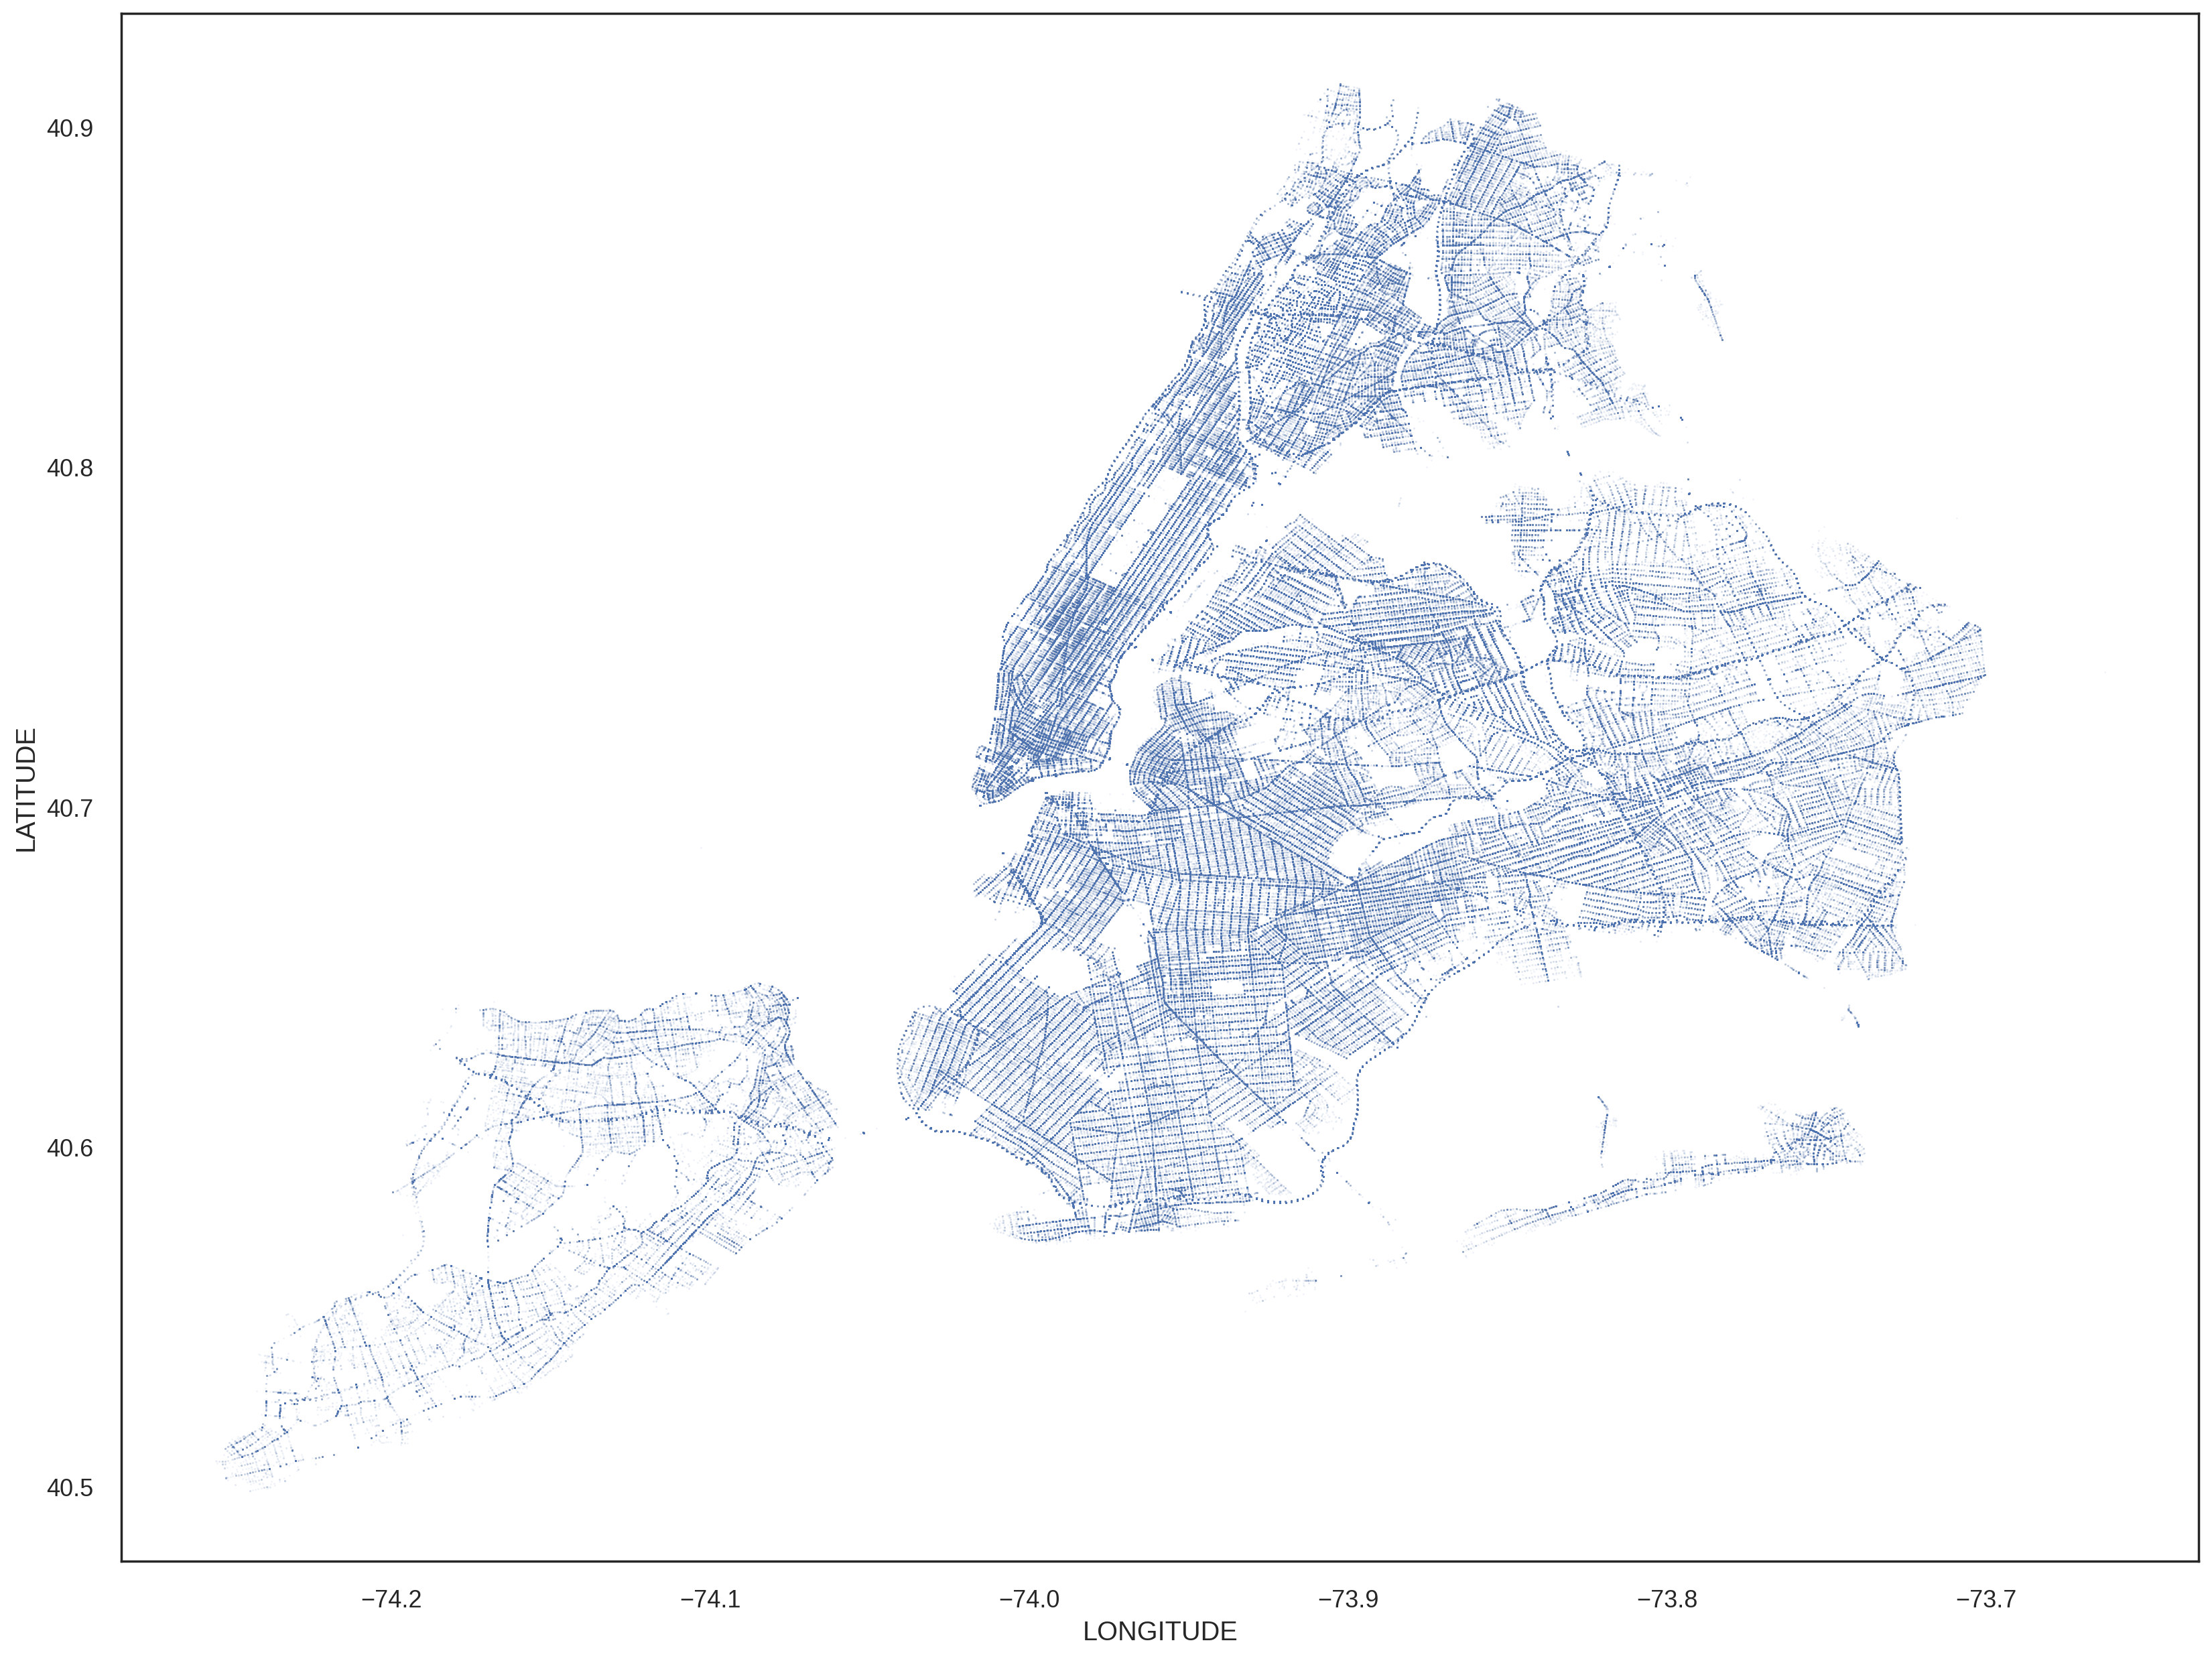

In [ ]:
cleandf.plot( kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15), s=0.5, alpha=0.05);

